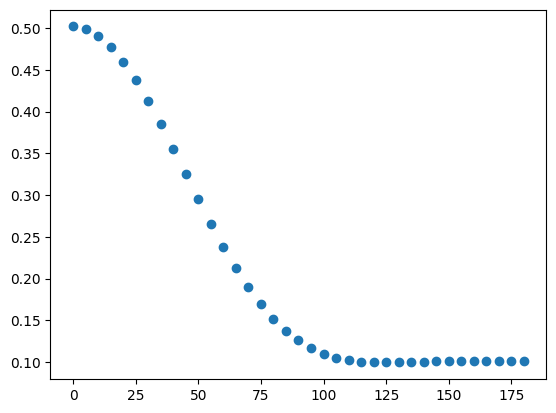

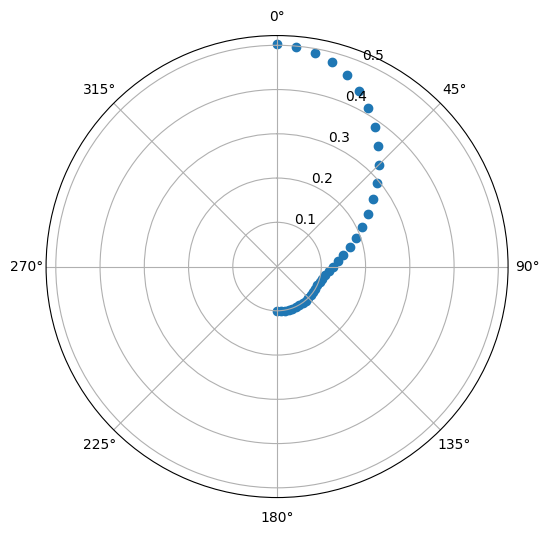

In [20]:
import matplotlib.pyplot as plt
import numpy as np

data_start_marker = "theta    phi    Pol.    S_11        S_12        S_21       S_22       S_31       S_41"
columns_of_interest = ['theta', 'phi', 'Pol.', 'S_11', 'S_12', 'S_21', 'S_22', 'S_31', 'S_41']
extracted_data = []

# This part of the code transforms the date from the w000r000.avg file into a data dictionary
with open('/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_CUBE/w000r000.avg', 'r') as file:
    data_section_started = False
    for line in file:
        # Check if the data section has started
        if data_start_marker in line:
            data_section_started = True
            continue  # Skip the header line
        
        if data_section_started:
            # Check if we've reached the end of the data section
            if line.strip() == "":
                break  # Exit the loop if an empty line is found
            
            # Split the line into components and extract the desired data
            parts = line.split()
            data_row = {col: parts[idx] for idx, col in enumerate(columns_of_interest)}
            extracted_data.append(data_row)

# Once the data is as a dictionary it needs to be transformed into a Data Frame         
# pip install pandas
import pandas as pd
# Convert list of dictionaries to DataFrame
df = pd.DataFrame(extracted_data)
# Convert string numbers to float if needed
df = df.astype(float)
#Display Data as a table
df

#Plot data in Cartessian coodinates 
plt.scatter(df[df["phi"]==0]["theta"],df[df["phi"]==0]["S_11"])

#Plot data in Polar Plot
# Convert 'theta' from degrees to radians for the polar plot
theta_radians = np.radians(df[df["phi"] == 0]["theta"].astype(float))
# 'S_11' values
s_11_values = df[df["phi"] == 0]["S_11"].astype(float)
# Create a polar plot
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='polar')
# Scatter plot on polar coordinates
ax.scatter(theta_radians, s_11_values)
# Set the theta direction to clockwise and start position (0 degrees) at the top
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
plt.show()


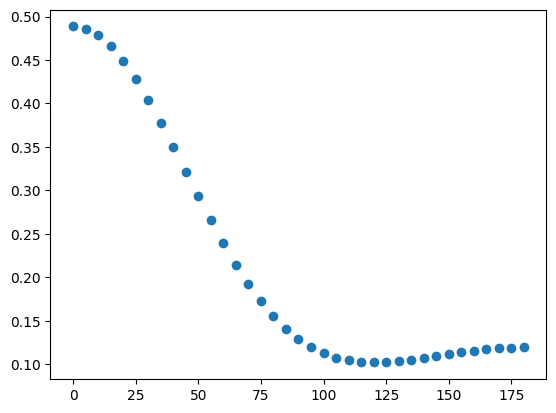

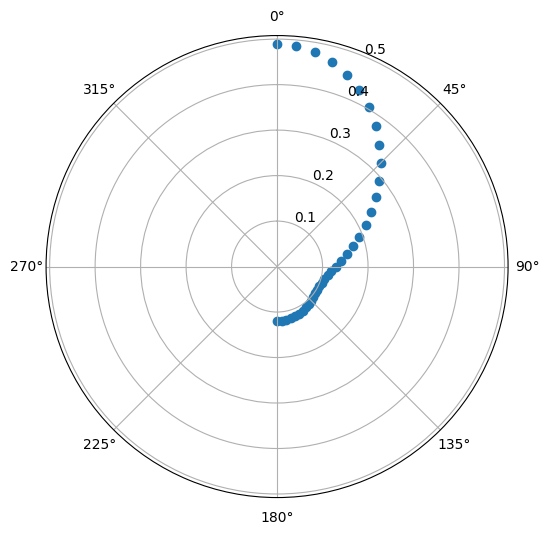

In [19]:
import matplotlib.pyplot as plt
import numpy as np

data_start_marker = "theta    phi    Pol.    S_11        S_12        S_21       S_22       S_31       S_41"
columns_of_interest = ['theta', 'phi', 'Pol.', 'S_11', 'S_12', 'S_21', 'S_22', 'S_31', 'S_41']
extracted_data = []

# This part of the code transforms the date from the w000r000.avg file into a data dictionary
with open('/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_SPHERE/w000r000.avg', 'r') as file:
    data_section_started = False
    for line in file:
        # Check if the data section has started
        if data_start_marker in line:
            data_section_started = True
            continue  # Skip the header line
        
        if data_section_started:
            # Check if we've reached the end of the data section
            if line.strip() == "":
                break  # Exit the loop if an empty line is found
            
            # Split the line into components and extract the desired data
            parts = line.split()
            data_row = {col: parts[idx] for idx, col in enumerate(columns_of_interest)}
            extracted_data.append(data_row)

# Once the data is as a dictionary it needs to be transformed into a Data Frame         
# pip install pandas
import pandas as pd
# Convert list of dictionaries to DataFrame
df = pd.DataFrame(extracted_data)
# Convert string numbers to float if needed
df = df.astype(float)
#Display Data as a table
df

#Plot data in Cartessian coodinates 
plt.scatter(df[df["phi"]==0]["theta"],df[df["phi"]==0]["S_11"])

#Plot data in Polar Plot
# Convert 'theta' from degrees to radians for the polar plot
theta_radians = np.radians(df[df["phi"] == 0]["theta"].astype(float))
# 'S_11' values
s_11_values = df[df["phi"] == 0]["S_11"].astype(float)
# Create a polar plot
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='polar')
# Scatter plot on polar coordinates
ax.scatter(theta_radians, s_11_values)
# Set the theta direction to clockwise and start position (0 degrees) at the top
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
plt.show()




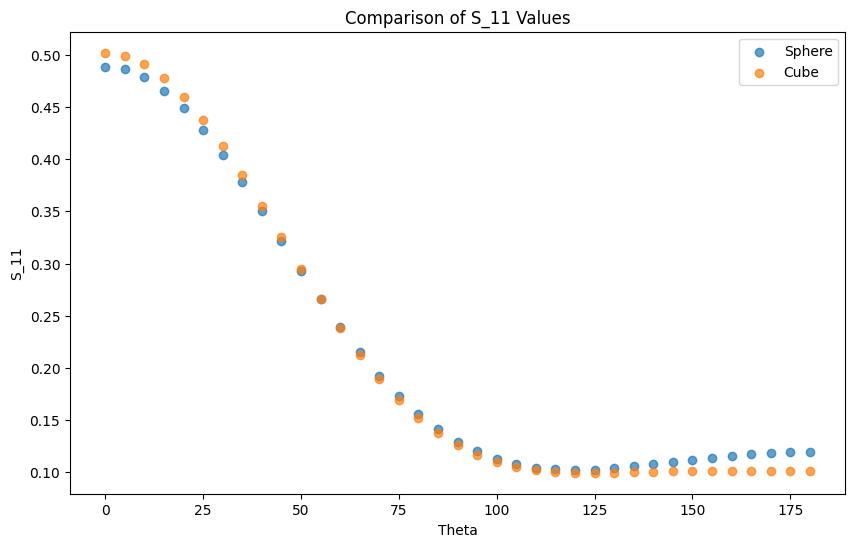

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def extract_data(file_path):
    """
    Extracts data from the given file path.
    
    Parameters:
    - file_path: Path to the file from which to extract data.
    
    Returns:
    - DataFrame containing extracted data.
    """
    data_start_marker = "theta    phi    Pol.    S_11        S_12        S_21       S_22       S_31       S_41"
    extracted_data = []
    with open(file_path, 'r') as file:
        data_section_started = False
        for line in file:
            if data_start_marker in line:
                data_section_started = True
                continue
            if data_section_started and line.strip() == "":
                break
            if data_section_started:
                parts = line.split()
                data_row = {col: parts[idx] for idx, col in enumerate(columns_of_interest)}
                extracted_data.append(data_row)
    df = pd.DataFrame(extracted_data)
    return df.astype(float)

# Define the columns of interest (for readability, though not necessary to redefine)
columns_of_interest = ['theta', 'phi', 'Pol.', 'S_11', 'S_12', 'S_21', 'S_22', 'S_31', 'S_41']

# Paths to the files
file1_path = '/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_SPHERE/w000r000.avg'
file2_path = '/Users/beatrizmassanz/Documents/GitHub/light-refraction-lunar-dust/DDA/examples_exp/0_CUBE/w000r000.avg' 

# Extract data from both files
df1 = extract_data(file1_path)
df2 = extract_data(file2_path)

# Plot data in Cartesian coordinates for both datasets
plt.figure(figsize=(10, 6))
plt.scatter(df1[df1["phi"] == 0]["theta"], df1[df1["phi"] == 0]["S_11"], label='Sphere', alpha=0.7)
plt.scatter(df2[df2["phi"] == 0]["theta"], df2[df2["phi"] == 0]["S_11"], label='Cube', alpha=0.7)
plt.xlabel('Theta')
plt.ylabel('S_11')
plt.title('Comparison of S_11 Values')
plt.legend()
plt.show()
